In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
import GPyOpt
from scipy.optimize import minimize, differential_evolution

from functionDoESpecial import functionDoESpecial, function_dimensions

%matplotlib inline

In [3]:
def process(filename, filepath='./skygrid_results_new/'):
    
    f_name, bound, dims, low_f, high_f = filename.split('_')
    bound = int(bound)
    dims = int(dims)
    low_f = int(low_f)
    high_f = int(high_f)
    
    objective = lambda x: functionDoESpecial(x.reshape(1, -1), f_name)
    if f_name in function_dimensions.keys():
        dims = function_dimensions[f_name]

    lower_bounds = [-1 * bound] * dims
    upper_bounds = [bound] * dims

    space = []
    for i in range(len(lower_bounds)):
        space.append({'name': 'x'+str(i), 'type': 'continuous', 'domain': (lower_bounds[i], upper_bounds[i])})

    feasible_region = GPyOpt.Design_space(space=space)

    #search max and min
    argmin = differential_evolution(objective, [(-bound, bound)] * dims).x
    argmax = differential_evolution(lambda x: -1 * objective(x), [(-bound, bound)] * dims).x
    max_v = objective(argmax)
    min_v = objective(argmin)
    #normalize function
    objective = lambda x: (functionDoESpecial(x, f_name) * 0.95 - min_v) / (max_v - min_v)
    
    with open(filepath+filename+'.txt', 'r') as f:
        js = json.load(f)
    
    agg = np.array(js)
    for i in range(len(agg)):
        for j in range(len(agg[i])):
            for k in range(len(agg[i,j])):
                agg[i,j,k] = np.array(agg[i,j,k])
                
    experiment_len = len(agg[0, 0, 0])
    
    algo_best = []
    for algo_i in range(len(agg)):
        best = []
        mean_fidelity = agg[algo_i, :,3].mean().mean()
        for attempt_i in range(len(agg[algo_i])):
            last_point = int(experiment_len * low_f / mean_fidelity)
            best_point = agg[algo_i, attempt_i, 1][agg[algo_i, attempt_i, 4][last_point-1]]
            according_value = objective(best_point.reshape(1, -1))
            best.append(according_value)
        algo_best.append(best)
    algo_best = np.array(algo_best)

    return algo_best.mean(axis=1)

In [4]:
from os import listdir
from os.path import isfile, join
files = [f for f in listdir('./skygrid_results_new/') if isfile(join('./skygrid_results_new/', f))]

df = np.empty((0, 6))

for file in files:
    file = file[:-4]
    print(file)
    metrics = process(file).reshape(1, -1)
    df = np.vstack([df, metrics])

michalewicz_2_7_100_500
michalewicz_2_5_5_10
rosenbrock_100_7_10_25
ackley1_1_5_100_200
michalewicz_2_2_100_500
ackley1_1_7_10_25
rosenbrock_100_5_50_100
ackley1_1_5_50_100
rosenbrock_100_7_5_25
ackley1_1_2_100_500
ackley1_1_5_100_500
rosenbrock_100_7_50_100
ackley1_1_2_5_25
ackley1_1_2_50_100
michalewicz_2_5_100_500
ackley1_1_7_100_500
michalewicz_2_2_10_25
michalewicz_2_7_5_10
ackley1_1_7_5_10
michalewicz_2_5_10_25
michalewicz_2_5_100_200
michalewicz_2_7_50_100
ackley1_1_2_100_200
michalewicz_2_7_5_25
michalewicz_2_5_50_100
michalewicz_2_2_5_10
rosenbrock_100_5_10_25
ackley1_1_5_5_10
ackley1_1_5_10_25
ackley1_1_7_50_100
ackley1_1_2_10_25
rosenbrock_100_5_5_10
rosenbrock_100_5_5_25
ackley1_1_5_5_25
rosenbrock_100_7_100_500
ackley1_1_7_100_200
ackley1_1_7_5_25
rosenbrock_100_7_5_10


In [5]:
files2 = [f for f in listdir('./skygrid_results_new_2/') if isfile(join('./skygrid_results_new_2/', f))]

df2 = np.empty((0, 6))

for file in files2:
    file = file[:-4]
    print(file)
    metrics = process(file, './skygrid_results_new_2/').reshape(1, -1)
    df2 = np.vstack([df2, metrics])

rosenbrock_100_7_10_25
ackley1_1_5_100_200
michalewicz_2_7_10_25
ackley1_1_7_10_25
rosenbrock_100_5_50_100
ackley1_1_2_5_10
rosenbrock_100_2_5_10
michalewicz_2_5_5_25
michalewicz_2_7_100_200
rosenbrock_100_7_50_100
ackley1_1_2_5_25
ackley1_1_2_50_100
michalewicz_2_2_10_25
michalewicz_2_7_5_10
ackley1_1_7_5_10
michalewicz_2_5_10_25
michalewicz_2_5_100_200
rosenbrock_100_2_10_25
michalewicz_2_7_50_100
ackley1_1_2_100_200
rosenbrock_100_2_100_200
michalewicz_2_7_5_25
rosenbrock_100_2_50_100
michalewicz_2_5_50_100
rosenbrock_100_5_10_25
rosenbrock_100_2_5_25
ackley1_1_5_5_10
ackley1_1_5_10_25
ackley1_1_7_50_100
ackley1_1_2_10_25
rosenbrock_100_5_100_200
rosenbrock_100_5_5_10
rosenbrock_100_5_5_25
ackley1_1_5_5_25
ackley1_1_7_100_200
ackley1_1_7_5_25
rosenbrock_100_7_5_10


In [35]:
df_common = np.vstack([df2, df])
df_select = df_common

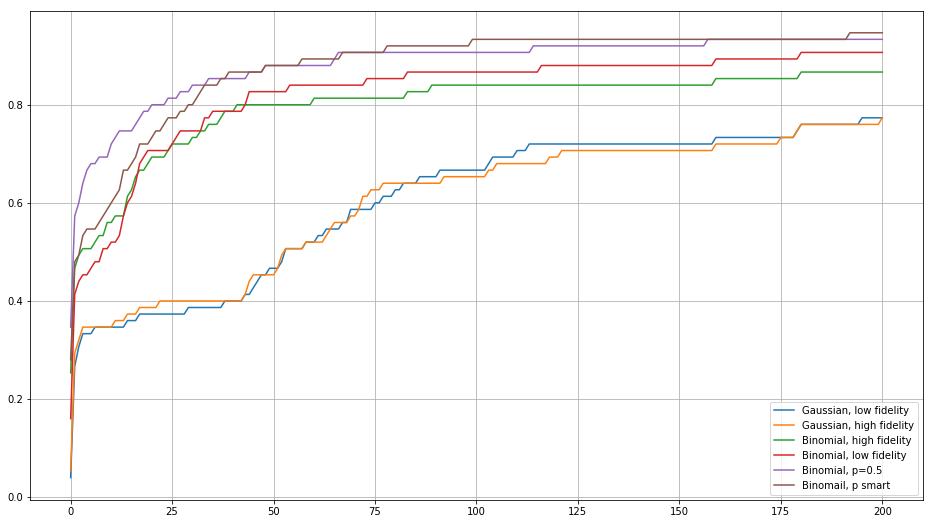

In [36]:
tau_ticks = 201
max_tau = np.sqrt(10)
ratios = []
# for df in experiments: # loop over the DFs with experiments
#     best_metric = df[metric][1:].min() # 0 row is initial
#     ratios.append((df[metric]/best_metric)[1:].values)

ratios = df_select / df_select.min(axis=1).reshape(-1, 1)

# ratios = np.array(ratios)
num_expers = ratios.shape[0]
dm_array = np.zeros((tau_ticks, ratios.shape[1]), float)
taus = np.linspace(1, max_tau, tau_ticks)
for cnt in range(tau_ticks): # loop over taus
    tau = taus[cnt]
    for cnt_algo in range(ratios.shape[1]): # loop over various algorithms
        dm_array[cnt, cnt_algo] = sum(ratios[:,cnt_algo] <= tau)*1./num_expers

plt.figure(figsize=(16, 9))
plt.plot(dm_array[:, 0], label='Gaussian, low fidelity')
plt.plot(dm_array[:, 1], label='Gaussian, high fidelity')
plt.plot(dm_array[:, 2], label='Binomial, high fidelity')
plt.plot(dm_array[:, 3], label='Binomial, low fidelity')
plt.plot(dm_array[:, 4], label='Binomial, p=0.5')
plt.plot(dm_array[:, 5], label='Binomail, p smart')
plt.legend()
plt.grid()

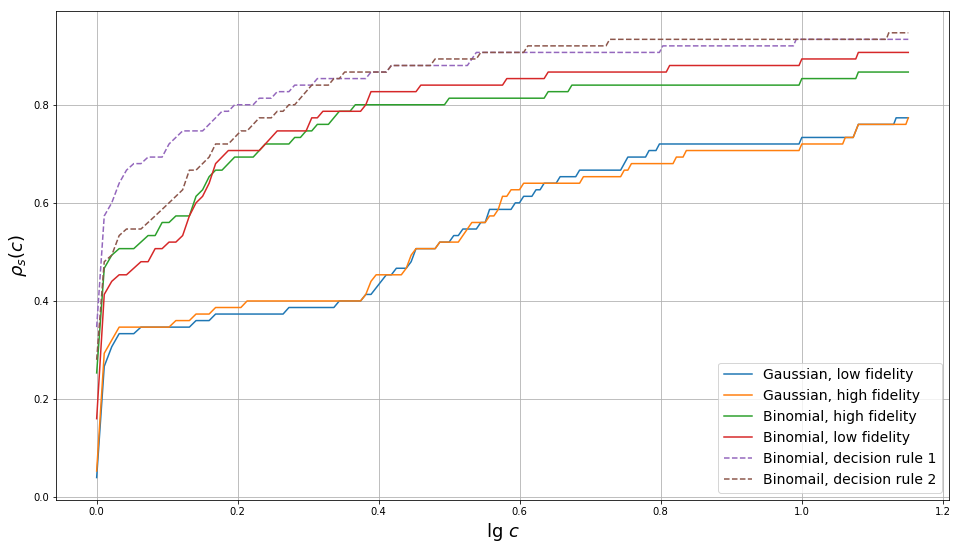

In [37]:
plt.figure(figsize=(16, 9))
plt.plot(np.log(taus), dm_array[:, 0], label='Gaussian, low fidelity')
plt.plot(np.log(taus), dm_array[:, 1], label='Gaussian, high fidelity')
plt.plot(np.log(taus), dm_array[:, 2], label='Binomial, high fidelity')
plt.plot(np.log(taus), dm_array[:, 3], label='Binomial, low fidelity')
plt.plot(np.log(taus), dm_array[:, 4], label='Binomial, decision rule 1', ls='--')
plt.plot(np.log(taus), dm_array[:, 5], label='Binomail, decision rule 2', ls='--')
plt.xlabel("lg $c$", fontsize=18)
plt.ylabel(r"$\rho_s(c)$", fontsize=18)
plt.legend(fontsize=14)
plt.grid()

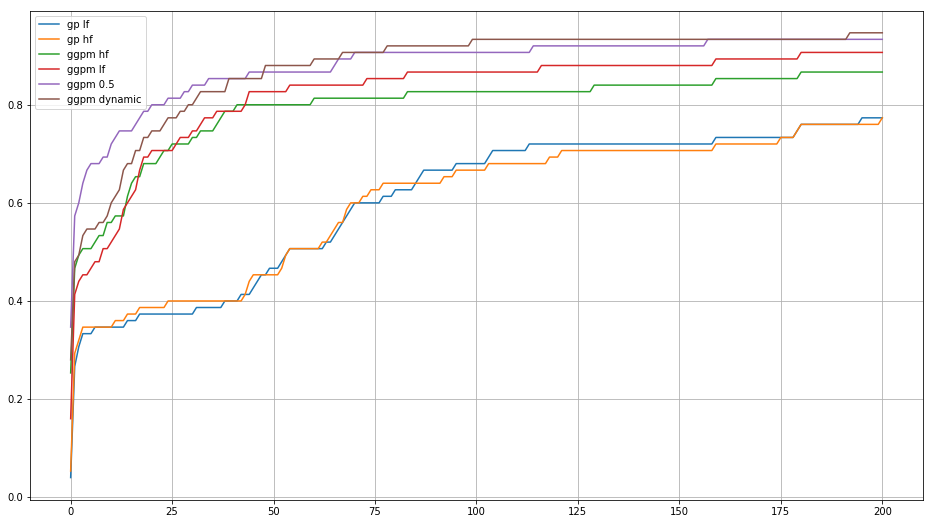

In [14]:
# tau_ticks = 201
# max_tau = np.sqrt(10)
# ratios = []
# # for df in experiments: # loop over the DFs with experiments
# #     best_metric = df[metric][1:].min() # 0 row is initial
# #     ratios.append((df[metric]/best_metric)[1:].values)

# ratios = df / df.min(axis=1).reshape(-1, 1)

# # ratios = np.array(ratios)
# num_expers = ratios.shape[0]
# dm_array = np.zeros((tau_ticks, ratios.shape[1]), float)
# taus = np.linspace(1, max_tau, tau_ticks)
# for cnt in range(tau_ticks): # loop over taus
#     tau = taus[cnt]
#     for cnt_algo in range(ratios.shape[1]): # loop over various algorithms
#         dm_array[cnt, cnt_algo] = sum(ratios[:,cnt_algo] <= tau)*1./num_expers

plt.figure(figsize=(16, 9))
plt.plot(dm_array[:, 0], label='gp lf')
plt.plot(dm_array[:, 1], label='gp hf')
plt.plot(dm_array[:, 2], label='ggpm hf')
plt.plot(dm_array[:, 3], label='ggpm lf')
plt.plot(dm_array[:, 4], label='ggpm 0.5')
plt.plot(dm_array[:, 5], label='ggpm dynamic')
plt.legend()
plt.grid()